<a href="https://colab.research.google.com/github/among5094/SWMilitaryAcademy/blob/main/0630(%EA%B8%88)_ffnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### custom FFNN
#### 2) 여러개의 layer가 있는 FFNN
이제 여러개의 layer가 있는 FFNN을 고려해보자. 이때 출력 노드의 수는 1로 하자.
$$\begin{aligned}
s_1 &= x \cdot w_1 + b_1,  &(b, H_1)\\
h_1 &= f_1(s_1), &(b, H_1) \\
s_2 &= h_1 \cdot w_2 + b_2,  &(b, H_2) \\
h_2 &= f_2(s_2),  &(b, H_2) \\
s_3 &= h_2 \cdot w_3 + b_3,  &(b, H_3 = 1) \\  h3은 1이라고 했지만 사실은 출력이 1개가 아니라 여러개이다. 객체탐지에서 봐도 사각형 하나가 출력되기 위해서 width,height,center이렇게 3개가 필요한데 이것만 봐도 출력이 하나가 아님. 여러개임  
  
\hat y &= f(s_3),  &(b, 1) \\
e &= (\hat y - y) \cdot (\hat y - y), &(1, ) \\
H_i &= \text{number of nodes of ith hidden layer}\\
w_i & shape : (H_{i-1}, H_i)
& \\
\cfrac {\partial e}{\partial w_3} &= \cfrac{\partial e}{\partial \hat y} \cfrac{\partial \hat y}{\partial s_3} \cfrac{\partial s_3}{\partial w_3}, &(H_2, H_3=1) \\
&= h_2^T \cdot \left[ 2(\hat y - y) \times f^{'}(s_3) \right]\\
(H_2, H_3=1) &= (b, H_2)^T \cdot [(b, 1) \times (b, 1)]\\
& \\
\cfrac {\partial e}{\partial h_2} &= \cfrac{\partial e}{\partial \hat y} \cfrac{\partial \hat y}{\partial s_3} \cfrac{\partial s_3}{\partial h_2}, &(b, H_2) \\
&= \left[ 2(\hat y - y) \times f^{'}(s_3) \right] \cdot w_3^T \\
(b, H_2) &= [(b, 1) \times (b, 1)] \cdot (H_3=1, H_2)\\
& \\
\cfrac {\partial e}{\partial w_2} &= \cfrac {\partial e}{\partial h_2} \cfrac{\partial h_2}{\partial s_2} \cfrac{\partial s_2}{\partial w_2}, &(H_1, H_2) \\
&= h_1^T \cdot \left[ \cfrac {\partial e}{\partial h_2} \times f_2^{'}(s_2) \right]\\
(H_1, H_2) &= (b, H_1)^T \cdot [(b, H_2) \times (b, H_2)]\\
& \\
\text{for b, }& \text{We assume } b \cdot x_0, \text{and always } x_0 = 1\\
\cfrac {\partial e}{\partial b_2} &= \cfrac {\partial e}{\partial h_2} \cfrac{\partial h_2}{\partial s_2} \cfrac{\partial s_2}{\partial b_2}, &(H_2,) \\
&= \sum_b \left[ \cfrac {\partial e}{\partial h_2} \times f_2^{'}(s_2) \right]\\
(H_2,) &= (b, 1)^T \cdot [(b, H_2) \times (b, H_2)]
\end{aligned}$$

따라서 일반화를 하면:
$$\begin{aligned}
\cfrac {\partial e}{\partial w_i} &= \cfrac {\partial e}{\partial h_i} \cfrac{\partial h_i}{\partial s_i} \cfrac{\partial s_i}{\partial w_i}, &(H_{i-1}, H_i) \\
&= h_{i-1}^T \cdot \left[ \cfrac {\partial e}{\partial h_i} \times f_i^{'}(s_i) \right]\\
(H_{i-1}, H_i) &= (b, H_{i-1})^T \cdot [(b, H_i) \times (b, H_i)]\\
& \\
\cfrac {\partial e}{\partial h_i} &= \cfrac{\partial e}{\partial h_{i+1}} \cfrac{\partial h_{i+1}}{\partial s_{i+1}} \cfrac{\partial s_{i+1}}{\partial h_i}, &(b, H_2) \\
&= \left[ \cfrac{\partial e}{\partial h_{i+1}}  \times f^{'}(s_{i+1}) \right] \cdot w_{i+1}^T \\
(b, H_i) &= [(b, H_{i+1}) \times (b, H_{i+1})] \cdot (H_{i+1}, H_i)\\
& \\
\cfrac {\partial e}{\partial b_i} &= \cfrac {\partial e}{\partial h_i} \cfrac{\partial h_i}{\partial s_i} \cfrac{\partial s_i}{\partial b_i}, &(H_i, ) \\
&= \sum_b \left[ \cfrac {\partial e}{\partial h_i} \times f_i^{'}(s_i) \right]\\
(H_i,) &= (b, 1)^T \cdot [(b, H_i) \times (b, H_i)]
\end{aligned}$$
- $b_i$를 구할 때, np.sum(arr, axis=-1)을 사용하면 된다.

이를 위해 propagate_forward(self, x)함수를 구해보자.

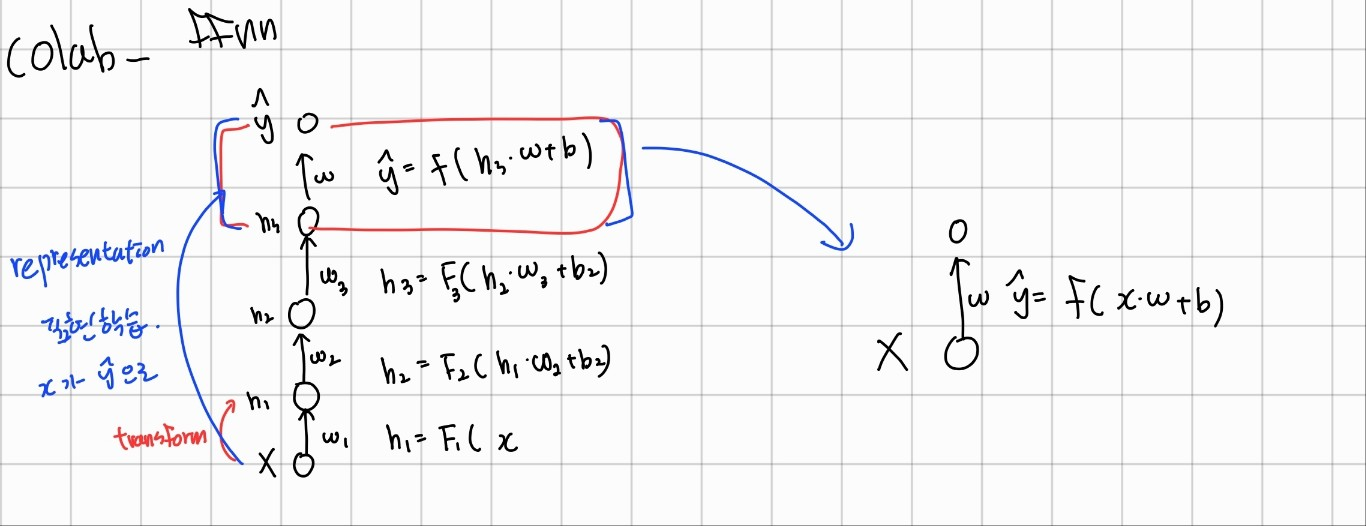

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
x_train = np.random.rand(1024,2)
y_train = np.array( [ [3 * x[0] - 1.2 * x[1] + .5] for x in x_train ] ) + \
                    np.random.randn(1024, 1)*0.1

x_val = np.random.rand(32,2)
y_val = np.array( [ [3 * x[0] - 1.2 * x[1] + .5] for x in x_val ] ) + \
                    np.random.randn(32, 1)*0.1

x_test = np.array( [ [0.2, 0.1], [0.3, 0.1], [0.4, 0.1], [0.5, 0.1] ] )
y_test = np.array( [ [3 * x[0] - 1.2 * x[1] + .5] for x in x_test ]) + \
                    np.random.randn(4, 1)*0.1

In [ ]:
print(x_train.shape, y_train.shape)

(1024, 2) (1024, 1)


이를 위해 multi layer를 구현할 수 있도록 다음과 같은 절차에 따라 작성한다.

1. layer를 추가할 수 있는 add 함수를 구현한다.
 - 인자로, input의 size와 activation

In [ ]:
class FFNN:

    def __init__(self, lr=0.01):
        self.lr = lr # learning rate
        # weights list
        self.ws = []; self.bs = []
        self.fs = []; self.f_derivs = []
        self.N_layers = 0

    # layer를 추가하며, weights를 초기화하기
    def add(self, units, activation=None, activation_deriv=None, input_dim=None):
        if input_dim == None:
            if self.N_layers == 0: raise ValueError
            else: input_dim = self.bs[-1].shape[0]
        w = np.random.randn(input_dim, units)
        b = np.zeros(units)
        self.ws.append(w); self.bs.append(b)
        self.fs.append(activation); self.f_derivs.append(activation_deriv)
        self.N_layers += 1


    # feed forwarding : o = f(s)
    def propagate_forward(self, x):
        s = []; h = [] # for l = 0
        for l in range(self.N_layers):
            if l == 0:
                z = x.dot(self.ws[l]) + self.bs[l]
            else:
                z = h[l-1].dot(self.ws[l] + self.bs[l])
            s.append(z); h.append(self.fs[l](z))
        return s, h

    # predicting
    def predict(self, x):
        s, h = self.propagate_forward(x)
        return h[-1] # yhat output from the last layer

    # train for one batch. x 자체가 batch
    def train_on_batch(self, x_batch, y_batch, istrain=True):
        rows = x_batch.shape[0]
        s, h = self.propagate_forward(x_batch)
        yhat = h[-1]
        loss = 1/2 * np.sum((yhat - y_batch)**2)

        if istrain:
            dws, dbs = [.0]*self.N_layers, [.0]*self.N_layers
            dhs, dss = [.0]*self.N_layers, [.0]*self.N_layers
            for i in range(self.N_layers-1, -1, -1):
                if i == self.N_layers-1:
                    dh = yhat - y_batch
                    ds = self.f_derivs[i](s[i])
                    dw = h[i-1].T.dot(dh*ds)
                    db = np.sum(dh*ds, axis=0)
                elif i != 0:
                    dh = (dhs[i+1]*dss[i+1]).dot(self.ws[i+1].T)
                    ds = self.f_derivs[i](s[i])
                    dw = h[i-1].T.dot(dh*ds)
                    db = np.sum(dh*ds, axis=0)
                else:
                    dh = (dhs[i+1]*dss[i+1]).dot(self.ws[i+1].T)
                    ds = self.f_derivs[i](s[i])
                    dw = x_batch.T.dot(dh*ds)
                    db = np.sum(dh*ds, axis=0)
                self.ws[i] -= self.lr*dw
                self.bs[i] -= self.lr*db
                dws[i], dbs[i], dhs[i], dss[i] = dw, db, dh, ds

        return loss


    # epochs에 대해 batch 별로 학습하기
    def fit(self, x, y, batch_size, epochs, validation_data=None):
        Losses = {} # validation loss after each epoch
        Losses['train'] = []
        if validation_data is not None:
            Losses['valid'] = []

        rows = x.shape[0]
        randidx = np.arange(rows)
        for epoch in range(epochs):
            loss = 0
            np.random.shuffle(randidx)
            for idx in range(0, rows, batch_size):
                batchIdx = randidx[idx:idx+batch_size]
                loss += self.train_on_batch(x[batchIdx], y[batchIdx])
            Losses['train'].append(loss/rows)
            print("%d epoch's train loss : %.8f" %(epoch, loss/rows))
            if validation_data is not None:
                val_rows = validation_data[0].shape[0]
                val_loss = self.train_on_batch(*validation_data, istrain=False)
                Losses['valid'].append(val_loss/val_rows)
                print("%d epoch's valid loss : %.8f" %(epoch, val_loss/val_rows))

        return Losses

다양한 activation 함수 구현:
$$\begin{aligned}
\text{Linear}(x) &= x\\
\cfrac {\partial \text{Linear}(x)}{\partial x} &= 1\\
\text{Sigmoid}(x) &= \sigma (x) = \cfrac {1}{1+\exp(-x)}\\
\cfrac {\partial \text{Sigmoid}(x)}{\partial x} &= \sigma(x) * (1-\sigma(x))\\
\text{tanh}(x) &= \cfrac {\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}\\
\cfrac {\partial \text{tanh}(x)}{\partial x} &= 1-\text{tanh}^2(x)\\\\
\text{ReLU}(x) &= max(x, 0)\\
\cfrac {\partial \text{ReLU}(x)}{\partial x} &= 1 \text{ if } x > 0 \text{ else } 0
\end{aligned}$$

In [ ]:
def linear(x): # linear y = x
    return x

def linear_deriv(x): # derivative of y = x
    return 1

def sigmoid(x): # sigmoid
    return 1. / (1 + np.exp(-x))

def sigmoid_deriv(x): # derivative of sigmoid
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x): # hyperbolicv tangent
    return np.tanh(x)

def tanh_deriv(x): # derivative of hyperbolic tangent
    return 1 - np.tanh(x) ** 2

def ReLU(x):
    if x > 0: return x
    else: return 0

def ReLU_deriv(x):
    if x > 0: return 1
    else: 0

2(p) > 3 > 3 > 2 hidden layer를 갖는 FFNN의 인스턴스를 생성한다.
- 입력 layer를 추가한다.
- 출력 3개의 선형 활성함수를 갖는 첫 hidden layer 추가
- 출력 3개의 sigmoid 활성함수를 갖는 둘째 hidden layer 추가
- 출력 2개의 tanh 활성함수를 갖는 셋째 hidden layer 추가
- 출력 1개의 linear 활성함수를 갖는 출력 layer 추가

In [ ]:
fnn = FFNN(0.0001)

In [ ]:
fnn.add(3, linear, linear_deriv, input_dim=x_train.shape[-1])
fnn.add(3, sigmoid, sigmoid_deriv)
# fnn.add(2, tanh, tanh_deriv)
fnn.add(1, linear, linear_deriv)

In [ ]:
Losses = fnn.fit(x_train, y_train, 32, 1000, (x_val, y_val))

0 epoch's train loss : 1.32358984
0 epoch's valid loss : 1.34783318
1 epoch's train loss : 0.88725842
1 epoch's valid loss : 0.97222349
2 epoch's train loss : 0.63105143
2 epoch's valid loss : 0.75007240
3 epoch's train loss : 0.48711556
3 epoch's valid loss : 0.62043372
4 epoch's train loss : 0.40708288
4 epoch's valid loss : 0.54434564
5 epoch's train loss : 0.36235098
5 epoch's valid loss : 0.49789549
6 epoch's train loss : 0.33660313
6 epoch's valid loss : 0.46855347
7 epoch's train loss : 0.32113976
7 epoch's valid loss : 0.44882193
8 epoch's train loss : 0.31107775
8 epoch's valid loss : 0.43485235
9 epoch's train loss : 0.30395151
9 epoch's valid loss : 0.42477780
10 epoch's train loss : 0.29866224
10 epoch's valid loss : 0.41661498
11 epoch's train loss : 0.29426779
11 epoch's valid loss : 0.40959146
12 epoch's train loss : 0.29020385
12 epoch's valid loss : 0.40328689
13 epoch's train loss : 0.28649695
13 epoch's valid loss : 0.39733262
14 epoch's train loss : 0.28268887
14 ep

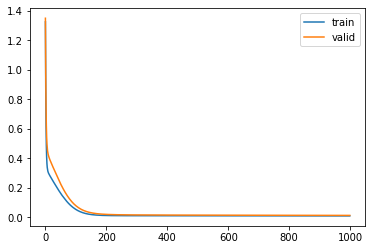

In [ ]:
pd.DataFrame(Losses).plot()

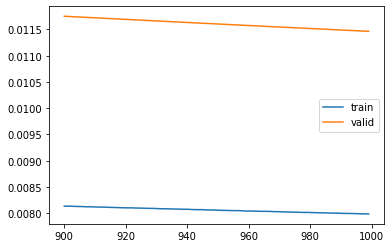

In [ ]:
pd.DataFrame(Losses)[-100:].plot()

In [ ]:
y_pred = fnn.predict(x_test)
print('y_pred'); print(y_pred)
print('y_test'); print(y_test)

y_pred
[[0.92577973]
 [1.27972035]
 [1.63029277]
 [1.96128257]]
y_test
[[0.94241391]
 [1.34936335]
 [1.65071981]
 [1.70451692]]


test 데이터에 대해 target과 prediction 간 산점도를 그려보자.

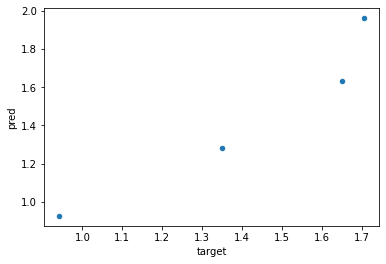

In [ ]:
testDf = pd.DataFrame(np.hstack([y_test, y_pred]), columns=['target', 'pred'])
testDf.plot.scatter('target', 'pred')